In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Embedding, Activation, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 5000)
X_train = sequence.pad_sequences(X_train, maxlen = 5000)
X_test = sequence.pad_sequences(X_test, maxlen = 5000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
#model 구조 설정
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#모델 실행 옵션
model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 3)

Epoch 1/100
469/469 [==============================] - 49s 73ms/step - loss: 0.4143 - accuracy: 0.7946 - val_loss: 0.2878 - val_accuracy: 0.8813
Epoch 2/100
469/469 [==============================] - 33s 71ms/step - loss: 0.2310 - accuracy: 0.9088 - val_loss: 0.2719 - val_accuracy: 0.8838
Epoch 3/100
469/469 [==============================] - 35s 75ms/step - loss: 0.1836 - accuracy: 0.9325 - val_loss: 0.2757 - val_accuracy: 0.8918
Epoch 4/100
469/469 [==============================] - 34s 72ms/step - loss: 0.1443 - accuracy: 0.9481 - val_loss: 0.2907 - val_accuracy: 0.8790
Epoch 5/100
782/782 [==============================] - 16s 21ms/step - loss: 0.3329 - accuracy: 0.8820

 Test Accuracy: 0.8820


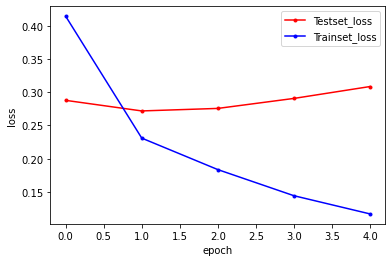

In [4]:
#모델 실행
history = model.fit(X_train, y_train, batch_size = 40, epochs = 100, validation_split = 0.25, callbacks = [early_stopping_callback])

#테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

#학습 데이터와 테스트셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()